In [19]:
import numpy as np
import pandas as pd

In [20]:
data = pd.read_csv("mpg.csv")

In [21]:
data = data[data.horsepower != "?"]

In [22]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [23]:
data.horsepower = data.horsepower.astype("float")      #object type has been changed to float

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
from sklearn.model_selection import train_test_split
df=data
training_features = [ 'acceleration','origin','displacement','model_year','horsepower']
target = 'mpg'

X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.10, random_state=169)

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=200,criterion='mse',
max_depth=5,min_samples_leaf=4,min_samples_split=5)

#difference between Randomforest and Extratrees is that there's no concept of weights of estimators in Extratrees algorithm

In [31]:
model.fit(X_train,Y_train)

ExtraTreesRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                    n_estimators=200)

In [32]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))


Mean squared error: 3.02
R Square score: 0.94


[Text(181.6468085106383, 199.32, 'X[1] <= 1.37\nmse = 61.932\nsamples = 352\nvalue = 23.496'),
 Text(83.7, 163.07999999999998, 'X[2] <= 176.624\nmse = 42.47\nsamples = 220\nvalue = 20.11'),
 Text(32.05531914893617, 126.83999999999999, 'X[3] <= 76.2\nmse = 20.731\nsamples = 69\nvalue = 27.693'),
 Text(14.246808510638298, 90.6, 'X[3] <= 73.933\nmse = 9.146\nsamples = 21\nvalue = 24.143'),
 Text(7.123404255319149, 54.359999999999985, 'mse = 8.38\nsamples = 11\nvalue = 23.273'),
 Text(21.370212765957447, 54.359999999999985, 'mse = 8.24\nsamples = 10\nvalue = 25.1'),
 Text(49.86382978723404, 90.6, 'X[2] <= 118.632\nmse = 17.874\nsamples = 48\nvalue = 29.246'),
 Text(35.61702127659574, 54.359999999999985, 'X[4] <= 80.169\nmse = 10.483\nsamples = 19\nvalue = 32.911'),
 Text(28.493617021276595, 18.119999999999976, 'mse = 9.016\nsamples = 14\nvalue = 33.7'),
 Text(42.740425531914894, 18.119999999999976, 'mse = 7.96\nsamples = 5\nvalue = 30.7'),
 Text(64.11063829787234, 54.359999999999985, 'X[4]

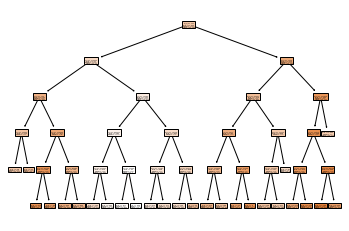

In [34]:
from sklearn.tree import plot_tree
plot_tree(model.estimators_[199],filled=True)

#reduce depth to get a clear picture with values
# model.estimators_[i] here i can be 0 to 199 since we have 200